In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Есть ли связь между жёсткостью воды и средней годовой смертностью?

In [ ]:
df=pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [ ]:
df.describe(include='all')

,Unnamed: 0,location,town,mortality,hardness
count,61.000000,61,61,61.000000,61.000000
unique,NaN,2,61,NaN,NaN
top,NaN,North,Bath,NaN,NaN
freq,NaN,35,1,NaN,NaN
mean,31.000000,NaN,NaN,1524.147541,47.180328
std,17.752934,NaN,NaN,187.668754,38.093966
min,1.000000,NaN,NaN,1096.000000,5.000000
25%,16.000000,NaN,NaN,1379.000000,14.000000
50%,31.000000,NaN,NaN,1555.000000,39.000000
75%,46.000000,NaN,NaN,1668.000000,75.000000


## Точечный график

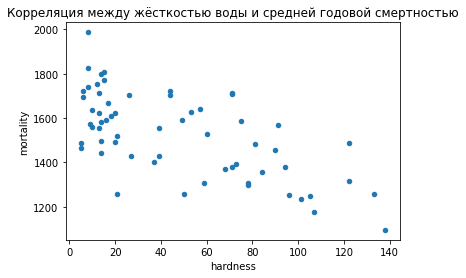

In [ ]:
# построим точечный график взаимосвязи между жёсткостью воды и средней годовой смертностью
df.plot(kind='scatter',
        x='hardness',
        y='mortality',
        title='Корреляция между жёсткостью воды и средней годовой смертностью'
       );

In [ ]:
# на графике прослеживается слабая обратная линейная связь между двумя переменными (уменьшение смертности при увеличении жесткости воды)

## Коэффициент корреляции Пирсона

In [ ]:
# считаем коэф. корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
# коэффициент от -1 до 0 обозначает обратную связь (тенденцию к уменьшению); связь не сильная, т.к. до 1 достаточно далеко

## Коэффициент корреляции Спирмана

In [ ]:
# считаем коэф. корреляции Спирмана
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
# данный расчет также показывает слабую отрицательную линейную корреляцию

## Модель линейной регрессии, коэффициент детерминации, график остатков

In [ ]:
# предполагаем линейную форму зависимости

In [ ]:
X=df[['hardness']]
y=df['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.index

Int64Index([19, 33, 57, 17, 52, 50, 47, 31, 48, 38, 56, 13, 22, 32, 30, 35, 23,
             4, 14, 29, 28, 55, 44, 18, 60, 20, 25,  6, 45,  7, 58,  1, 16,  0,
            15,  5, 11,  9,  8, 12, 43, 37],
           dtype='int64')

In [ ]:
X_train.shape

(42, 1)

In [ ]:
y_train.shape

(42,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
np.round(model.coef_, 3)

array([-3.657])

In [ ]:
np.round(model.intercept_, 3)

1688.066

In [ ]:
# y = -3.657 * x + 1668.066 уравнение линейной регрессии

In [ ]:
y_pred = np.round(model.predict(X_test), 0)
y_pred

array([1666., 1641., 1670., 1414., 1641., 1630., 1202., 1666., 1319.,
       1359., 1355., 1641., 1637., 1637., 1553., 1392., 1344., 1421.,
       1428.])

In [ ]:
y_test

40    1696
42    1711
2     1466
49    1587
51    1557
26    1591
34    1259
36    1724
41    1236
39    1456
24    1569
54    1625
46    1495
3     1800
27    1402
59    1485
21    1379
10    1392
53    1709
Name: mortality, dtype: int64

In [ ]:
# значения по предсказаниям сильно отличаются от тестовых

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.30602504827717636

In [ ]:
# Коэффициент детерминации показывает очень слабую зависимость. Для регрессионных приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50%.

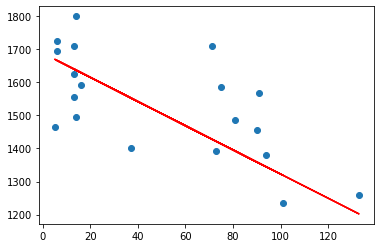

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r');

In [ ]:
# остатки ведут себя достаточно хаотично, нет резких выбросов, в чередовании знаков нет закономерностей.

# Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [ ]:
df_north = df[df['location'] == 'North']
df_south = df[df['location'] == 'South']

## Северные города

In [ ]:
df_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


In [ ]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB


### Точечный график

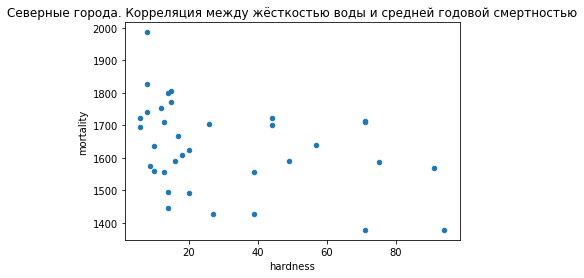

In [ ]:
# построим точечный график взаимосвязи между жёсткостью воды и средней годовой смертностью
df_north.plot(kind='scatter',
        x='hardness',
        y='mortality',
        title='Северные города. Корреляция между жёсткостью воды и средней годовой смертностью'
       );

In [ ]:
# на графике не прослеживается явной линейной корреляции

### Коэффициент корреляции Пирсона

In [ ]:
# считаем коэф. корреляции Пирсона
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
# коэффициент от -1 до 0 обозначает обратную связь (тенденцию к уменьшению); связь очень слабая, т.к. до 1 далеко

### Коэффициент корреляции Спирмана

In [ ]:
# считаем коэф. корреляции Спирмана
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
# данный расчет также показывает очень слабую отрицательную линейную корреляцию

### Модель линейной регрессии, коэффициент детерминации, график остатков

In [ ]:
X=df_north[['hardness']]
y=df_north['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.index

Int64Index([43,  6,  4, 42, 44, 20, 52, 36, 51, 35, 30, 11, 23, 15, 60,  3, 28,
             1, 26,  8, 21, 17, 16, 22],
           dtype='int64')

In [ ]:
X_train.shape

(24, 1)

In [ ]:
y_train.shape

(24,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
np.round(model.coef_, 3)

array([-3.328])

In [ ]:
np.round(model.intercept_, 3)

1702.366

In [ ]:
# y = -3.328 * x + 1702.366 уравнение линейной регрессии

In [ ]:
y_pred = np.round(model.predict(X_test), 0)
y_pred

array([1400., 1556., 1669., 1466., 1636., 1453., 1682., 1656., 1676.,
       1466., 1676.])

In [ ]:
y_test

24    1569
31    1702
5     1558
50    1713
55    1625
49    1587
40    1696
46    1495
45    1987
53    1709
29    1828
Name: mortality, dtype: int64

In [ ]:
# значения по предсказаниям очень сильно отличаются от тестовых

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

-0.8059562565000893

In [ ]:
# Коэффициент детерминации оказался отрицательным. Это значит, что модель не работает и даёт прогноз хуже, чем простое усреднение.

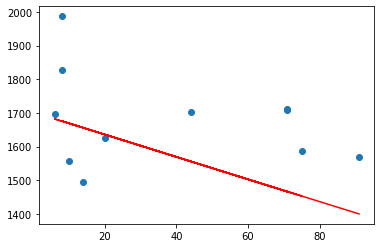

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r');

In [ ]:
# в чередовании знаков остатков прослеживаются закономерности.

## Южные города

In [ ]:
df_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [ ]:
df_south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


### Точечный график

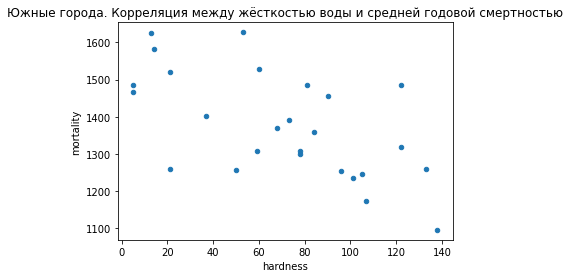

In [ ]:
# построим точечный график взаимосвязи между жёсткостью воды и средней годовой смертностью
df_south.plot(kind='scatter',
        x='hardness',
        y='mortality',
        title='Южные города. Корреляция между жёсткостью воды и средней годовой смертностью'
       );

In [ ]:
# на графике прослеживается слабая отрицательная линейная корреляция

### Коэффициент корреляции Пирсона

In [ ]:
# считаем коэф. корреляции Пирсона
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
# коэффициент от -1 до 0 обозначает обратную связь (тенденцию к уменьшению); связь слабая, т.к. до 1 достаточно далеко

### Коэффициент корреляции Спирмана

In [ ]:
# считаем коэф. корреляции Спирмана
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
# данный расчет также показывает очень отрицательную линейную корреляцию

### Модель линейной регрессии, коэффициент детерминации, график остатков

In [ ]:
X=df_south[['hardness']]
y=df_south['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.index

Int64Index([10, 7, 54, 13, 34, 14, 57, 2, 38, 0, 37, 59, 58, 19, 18, 32, 27,
            12],
           dtype='int64')

In [ ]:
X_train.shape

(18, 1)

In [ ]:
y_train.shape

(18,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
np.round(model.coef_, 3)

array([-1.874])

In [ ]:
np.round(model.intercept_, 3)

1520.492

In [ ]:
# y = -1.874 * x + 1520.492 уравнение линейной регрессии

In [ ]:
y_pred = np.round(model.predict(X_test), 0)
y_pred

array([1331., 1410., 1352., 1363., 1408., 1262., 1393., 1427.])

In [ ]:
y_test

41    1236
33    1309
39    1456
9     1359
56    1527
25    1096
47    1369
48    1257
Name: mortality, dtype: int64

In [ ]:
# значения по предсказаниям сильно отличаются от тестовых

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.19850621188305384

In [ ]:
# Коэффициент детерминации оказался положительным, но слишком маленьким. Можно назвать модель неприемлемой.
# Возможно, такой результат связан с недостаточным набором данных. При увеличении тестового размера до 50%, показывает коэф.0,33

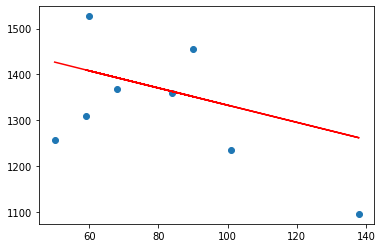

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r');

In [ ]:
# остатки хаотичные